In [72]:
import pandas as pd
import numpy as np
import ast
import json
from datetime import datetime

In [73]:
df = pd.read_csv('cleaner_list_of_summary_rent_listings.csv', engine='python')

df.tail()


,address,bath,bedrooms,borough,extra,nearest_subway,neighborhood,rent,sqft,unit,url
6654,247 W 87th St,1.0,Studio,Manhattan,"['No Fee', 'Exclusive', 'Doorman', 'Elevator',...",0.04,Upper West Side,3450,0,Apt 11H,https://www.renthop.com/listings/247-w-87th-st...
6655,Essex street studio!!,1.0,Studio,Manhattan,[''],0.12,Chinatown,1850,0,NaN,https://www.renthop.com/listings/essex-street-...
6656,West 30th st,2.0,3,Manhattan,"['Elevator', 'Private Outdoor Space', 'Elevato...",0.22,Chelsea,5000,0,NaN,https://www.renthop.com/listings/west-30th-st/...
6657,Center Boulevard,1.0,1,Queens,"['Doorman', 'Elevator', 'Doorman', 'Fitness Ce...",0.34,Hunters Point,3387,0,NaN,https://www.renthop.com/listings/center-boulev...
6658,East 2nd Street,1.0,2,Manhattan,"['No Fee', 'Doorman', 'Elevator', 'Laundry in ...",0.42,Alphabet City,3700,0,NaN,https://www.renthop.com/listings/east-2nd-stre...


In [145]:
df[df['rent']>10000]

,address,bath,bedrooms,borough,extra,nearest_subway,neighborhood,rent,sqft,unit,url
38,West 87th Street,2.5,3Flex 4,Manhattan,"['No Fee', 'Doorman', 'Elevator', 'Laundry in ...",NaN,Upper West Side,10500,0,NaN,https://www.renthop.com/listings/west-87th-str...
53,West 87th Street,2.5,3Flex 4,Manhattan,"['No Fee', 'Doorman', 'Elevator', 'Laundry in ...",NaN,Upper West Side,10500,0,NaN,https://www.renthop.com/listings/west-87th-str...
65,West 87th Street,2.5,3Flex 4,Manhattan,"['No Fee', 'Doorman', 'Elevator', 'Laundry in ...",NaN,Upper West Side,10500,0,NaN,https://www.renthop.com/listings/west-87th-str...
96,Seventh Avenue,3.0,5,Manhattan,"['Doorman', 'Elevator', 'Pre-War', 'Featured',...",0.06,Theater District,10250,0,NaN,https://www.renthop.com/listings/seventh-avenu...
107,Seventh Avenue,3.0,5,Manhattan,"['Doorman', 'Elevator', 'Pre-War', 'Featured',...",0.06,Theater District,10250,0,NaN,https://www.renthop.com/listings/seventh-avenu...
138,400 West 63rd Street,3.0,3,Manhattan,"['No Fee', 'Exclusive', 'Doorman', 'Elevator',...",0.43,Lincoln Square,13330,0,Apt 2202...,https://www.renthop.com/listings/400-west-63rd...
141,400 West 63rd Street,3.0,3,Manhattan,"['No Fee', 'Exclusive', 'Doorman', 'Elevator',...",0.43,Lincoln Square,13330,0,Apt 2202...,https://www.renthop.com/listings/400-west-63rd...
153,E 84th St.,4.0,4,Manhattan,"['No Fee', 'Doorman', 'Elevator', 'Laundry in ...",0.17,Yorkville,16000,0,NaN,https://www.renthop.com/listings/e-84th-st/40a...
456,River Terrace,3.0,3,Manhattan,"['Doorman', 'Elevator', 'Deck', 'Doorman', 'El...",0.37,Battery Park City,12750,0,NaN,https://www.renthop.com/listings/river-terrace...
464,River Terrace,3.0,3,Manhattan,"['Doorman', 'Elevator', 'Deck', 'Doorman', 'El...",0.37,Battery Park City,12750,0,NaN,https://www.renthop.com/listings/river-terrace...


In [149]:
df.url[806]

'https://www.renthop.com/listings/8-east-12th-st/na/14340981'

In [74]:
df.neighborhood = df.neighborhood.replace({' East Village': 'East Village', ' Financial District': 'Financial District', ' Gowanus': 'Gowanus', " Hell's Kitchen": "Hell's Kitchen", ' Lower East Side': 'Lower East Side', ' Upper East Side': 'Upper East Side', ' Upper West Side': 'Upper West Side', ' West Village': 'West Village', ' Williamsburg': 'Williamsburg'})


In [75]:
neighborhoods = list(df.neighborhood.unique())
neighborhoods.sort()
neighborhoods

['Alphabet City',
 'Arverne',
 'Astoria',
 'Astoria Heights',
 'Auburndale',
 'Battery Park City',
 'Bay Ridge',
 'Bedford-Stuyvesant',
 'Bensonhurst',
 'Bergen Beach',
 'Beverley Square East',
 'Bithlo',
 'Boerum Hill',
 'Borough Park',
 'Bowery',
 'Briarwood',
 'Bronxwood',
 'Brooklyn Heights',
 'Bushwick',
 'Carnegie Hill',
 'Carroll Gardens',
 'Central Harlem',
 'Central Park',
 'Central Riverdale',
 'Central Slope',
 'Chelsea',
 'Chinatown',
 'Civic Center',
 'Clarion',
 'Clinton Hill',
 'Cobble Hill',
 'College Point',
 'Crown Heights',
 'DUMBO',
 'Ditmars',
 'Downtown Brooklyn',
 'Downtown Flushing',
 'East Flatbush',
 'East Harlem',
 'East New York',
 'East Village',
 'East Williamsburg',
 'Elmhurst',
 'Far Rockaway',
 'Financial District',
 'Flatbush',
 'Flatiron District',
 'Flushing',
 'Fordham Heights',
 'Fordham Manor',
 'Forest Hills',
 'Fort George',
 'Fort Greene',
 'Fresh Meadows',
 'Garment District',
 'Glendale',
 'Governors Island',
 'Gowanus',
 'Gramercy Park',
 'G

In [76]:
zipcode_df = pd.read_csv('dataframe_with_zipcodes_only.csv', engine='python')
zipcode_df.head()


,neighborhood,zipcode
0,Alphabet City,10002.0
1,Arverne,11692.0
2,Astoria,11101.0
3,Astoria Heights,11370.0
4,Auburndale,11358.0


In [77]:
df.loc[df.index == 3964].neighborhood
df.loc[df.index == 3964]

,address,bath,bedrooms,borough,extra,nearest_subway,neighborhood,rent,sqft,unit,url
3964,260 Washington Ave,1.0,2,Brooklyn,"['No Fee', 'Exclusive', 'Laundry in Unit', 'No...",0.13,East New York,3375,0,NaN,https://www.renthop.com/listings/260-washingto...


In [78]:
df.neighborhood.value_counts()

Financial District      571
Hell's Kitchen          540
Upper East Side         389
Yorkville               265
Murray Hill             254
Upper West Side         233
Bushwick                215
Rose Hill               184
East Village            178
Chelsea                 177
Theater District        161
West Village            149
Manhattan Valley        139
Turtle Bay              138
Tribeca                 125
Long Island City        118
Bedford-Stuyvesant      116
Lincoln Square          107
Gramercy Park           104
Astoria                 103
Alphabet City           102
Williamsburg            102
Hunters Point            88
East Harlem              82
Greenwich Village        77
Battery Park City        71
Lower East Side          71
Downtown Brooklyn        68
Kips Bay                 66
East Williamsburg        64
                       ... 
Vinegar Hill              2
Astoria Heights           2
College Point             2
Kingsbridge Heights       2
Pelham              

In [79]:
zipdf = pd.read_csv('zip_code_info.csv', engine='python')

In [80]:
zipdf.head()

,median_income,neighborhood,percent_high_earner,zipcode
0,35449.0,Alphabet City,6.4,10002.0
1,45816.0,Arverne,3.0,11692.0
2,57866.0,Astoria,11.9,11101.0
3,59901.0,Astoria Heights,4.5,11370.0
4,65932.0,Auburndale,8.4,11358.0


In [81]:
main_df = pd.merge(df, zipdf, on='neighborhood', how='outer')

In [82]:
main_df.tail()

,address,bath,bedrooms,borough,extra,nearest_subway,neighborhood,rent,sqft,unit,url,median_income,percent_high_earner,zipcode
6654,2368 West Street,1.0,2,Brooklyn,"['Exclusive', '', 'Terrace', 'Stainless Steel ...",0.22,Gravesend,2200,0,Apt 2,https://www.renthop.com/listings/2368-west-str...,46310.0,5.1,11223.0
6655,tibbett avenue,2.0,2,Manhattan,"['', 'Reduced Fee']",0.29,Marble Hill,2200,0,NaN,https://www.renthop.com/listings/tibbett-avenu...,58881.0,6.3,10463.0
6656,tibbett avenue,2.0,2,Manhattan,"['', 'Reduced Fee']",0.29,Marble Hill,2200,0,NaN,https://www.renthop.com/listings/tibbett-avenu...,58881.0,6.3,10463.0
6657,43rd Ave.,1.0,Studio,Queens,"['Elevator', 'Hardwood Floors', 'Elevator', 'L...",NaN,Auburndale,1595,0,NaN,https://www.renthop.com/listings/43rd-ave/102c...,65932.0,8.4,11358.0
6658,164th Street,1.0,2,Queens,"['Hardwood Floors', 'Dining Room', 'Dishwasher...",NaN,Pomonok,2000,0,NaN,https://www.renthop.com/listings/164th-street/...,63455.0,5.6,11365.0


In [83]:
main_df.isnull().sum()

address                  65
bath                      0
bedrooms                  0
borough                   0
extra                     0
nearest_subway          116
neighborhood              0
rent                      0
sqft                      0
unit                   4612
url                       0
median_income            42
percent_high_earner      42
zipcode                  42
dtype: int64

In [84]:
main_df.to_csv("main_listing_dataframe.csv", index=False)

In [85]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6659 entries, 0 to 6658
Data columns (total 14 columns):
address                6594 non-null object
bath                   6659 non-null float64
bedrooms               6659 non-null object
borough                6659 non-null object
extra                  6659 non-null object
nearest_subway         6543 non-null float64
neighborhood           6659 non-null object
rent                   6659 non-null int64
sqft                   6659 non-null int64
unit                   2047 non-null object
url                    6659 non-null object
median_income          6617 non-null float64
percent_high_earner    6617 non-null float64
zipcode                6617 non-null float64
dtypes: float64(5), int64(2), object(7)
memory usage: 780.4+ KB


In [86]:
for col in main_df.columns:
    lst = list(main_df.loc[main_df[col] == 'Queens'].index)
    print(col)
    print(lst)

address
[]
bath
[]
bedrooms
[]
borough
[614, 615, 616, 628, 751, 752, 804, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 2862, 2863, 2864, 2865, 4629, 4630, 4631, 4632, 4633, 4634, 4635, 4636, 4637, 4638, 4639, 4640, 4641, 4642, 4643, 4644, 4645, 4646, 4647, 4648, 4649, 4650, 4651, 4652, 4653, 4654, 4655, 4656, 4657, 4658, 4659, 4660, 4661, 4662, 4663, 4664, 4665, 4666, 4667, 4668, 4669, 4670, 4671, 4672, 4673, 4674, 4675, 4676, 4677, 4678, 4679, 4680, 4

/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [87]:
test = main_df.drop(['url', 'unit'], axis = 1)
test

,address,bath,bedrooms,borough,extra,nearest_subway,neighborhood,rent,sqft,median_income,percent_high_earner,zipcode
0,453 Milford Street,1.0,3,Brooklyn,"['Exclusive', '', 'Featured', 'Exclusive', 'Ca...",0.50,New Lots,2200,0,63700.0,4.4,11236.0
1,37 King St,1.0,1,Manhattan,"['Exclusive', 'Elevator', 'Featured', 'Exclusi...",0.06,Hudson Square,4500,0,106056.0,33.4,10013.0
2,Hudson St,2.0,2,Manhattan,[''],0.18,Hudson Square,9395,0,106056.0,33.4,10013.0
3,600 West 42nd Street,1.0,1,Manhattan,"['Exclusive', 'By Owner', 'Doorman', 'Elevator...",0.38,Hell's Kitchen,4300,0,93707.0,19.8,10036.0
4,785 Ninth Avenue 3c,1.0,2,Manhattan,"['Exclusive', 'Pre-War', 'Featured', 'Exclusiv...",0.21,Hell's Kitchen,3199,700,93707.0,19.8,10036.0
5,785 Ninth Avenue 3c,1.0,2,Manhattan,"['Exclusive', 'Pre-War', 'Featured', 'Exclusiv...",0.21,Hell's Kitchen,3199,700,93707.0,19.8,10036.0
6,785 Ninth Avenue 3c,1.0,2,Manhattan,"['Exclusive', 'Pre-War', 'Featured', 'Exclusiv...",0.21,Hell's Kitchen,3199,700,93707.0,19.8,10036.0
7,312 W 58th Street,2.0,4,Manhattan,"['No Fee', 'Exclusive', 'Laundry in Unit', 'No...",0.08,Hell's Kitchen,7150,1,93707.0,19.8,10036.0
8,321 W 47th St,2.0,2,Manhattan,"['No Fee', 'Exclusive', '', 'No Fee', 'Feature...",0.17,Hell's Kitchen,3500,0,93707.0,19.8,10036.0
9,524 West 50th Street,1.0,Studio,Manhattan,"['Exclusive', 'Featured', 'Laundry in Building...",0.41,Hell's Kitchen,1999,500,93707.0,19.8,10036.0


In [88]:
test.dropna(subset = ['nearest_subway', 'median_income'],axis = 0, inplace = True)
test

,address,bath,bedrooms,borough,extra,nearest_subway,neighborhood,rent,sqft,median_income,percent_high_earner,zipcode
0,453 Milford Street,1.0,3,Brooklyn,"['Exclusive', '', 'Featured', 'Exclusive', 'Ca...",0.50,New Lots,2200,0,63700.0,4.4,11236.0
1,37 King St,1.0,1,Manhattan,"['Exclusive', 'Elevator', 'Featured', 'Exclusi...",0.06,Hudson Square,4500,0,106056.0,33.4,10013.0
2,Hudson St,2.0,2,Manhattan,[''],0.18,Hudson Square,9395,0,106056.0,33.4,10013.0
3,600 West 42nd Street,1.0,1,Manhattan,"['Exclusive', 'By Owner', 'Doorman', 'Elevator...",0.38,Hell's Kitchen,4300,0,93707.0,19.8,10036.0
4,785 Ninth Avenue 3c,1.0,2,Manhattan,"['Exclusive', 'Pre-War', 'Featured', 'Exclusiv...",0.21,Hell's Kitchen,3199,700,93707.0,19.8,10036.0
5,785 Ninth Avenue 3c,1.0,2,Manhattan,"['Exclusive', 'Pre-War', 'Featured', 'Exclusiv...",0.21,Hell's Kitchen,3199,700,93707.0,19.8,10036.0
6,785 Ninth Avenue 3c,1.0,2,Manhattan,"['Exclusive', 'Pre-War', 'Featured', 'Exclusiv...",0.21,Hell's Kitchen,3199,700,93707.0,19.8,10036.0
7,312 W 58th Street,2.0,4,Manhattan,"['No Fee', 'Exclusive', 'Laundry in Unit', 'No...",0.08,Hell's Kitchen,7150,1,93707.0,19.8,10036.0
8,321 W 47th St,2.0,2,Manhattan,"['No Fee', 'Exclusive', '', 'No Fee', 'Feature...",0.17,Hell's Kitchen,3500,0,93707.0,19.8,10036.0
9,524 West 50th Street,1.0,Studio,Manhattan,"['Exclusive', 'Featured', 'Laundry in Building...",0.41,Hell's Kitchen,1999,500,93707.0,19.8,10036.0


In [89]:
test.isnull().sum()

address                65
bath                    0
bedrooms                0
borough                 0
extra                   0
nearest_subway          0
neighborhood            0
rent                    0
sqft                    0
median_income           0
percent_high_earner     0
zipcode                 0
dtype: int64

In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6538 entries, 0 to 6656
Data columns (total 12 columns):
address                6473 non-null object
bath                   6538 non-null float64
bedrooms               6538 non-null object
borough                6538 non-null object
extra                  6538 non-null object
nearest_subway         6538 non-null float64
neighborhood           6538 non-null object
rent                   6538 non-null int64
sqft                   6538 non-null int64
median_income          6538 non-null float64
percent_high_earner    6538 non-null float64
zipcode                6538 non-null float64
dtypes: float64(5), int64(2), object(5)
memory usage: 664.0+ KB


In [91]:
test.to_csv("main_listing_dataframe.csv", index=False)

In [92]:
main_df = test
main_df

,address,bath,bedrooms,borough,extra,nearest_subway,neighborhood,rent,sqft,median_income,percent_high_earner,zipcode
0,453 Milford Street,1.0,3,Brooklyn,"['Exclusive', '', 'Featured', 'Exclusive', 'Ca...",0.50,New Lots,2200,0,63700.0,4.4,11236.0
1,37 King St,1.0,1,Manhattan,"['Exclusive', 'Elevator', 'Featured', 'Exclusi...",0.06,Hudson Square,4500,0,106056.0,33.4,10013.0
2,Hudson St,2.0,2,Manhattan,[''],0.18,Hudson Square,9395,0,106056.0,33.4,10013.0
3,600 West 42nd Street,1.0,1,Manhattan,"['Exclusive', 'By Owner', 'Doorman', 'Elevator...",0.38,Hell's Kitchen,4300,0,93707.0,19.8,10036.0
4,785 Ninth Avenue 3c,1.0,2,Manhattan,"['Exclusive', 'Pre-War', 'Featured', 'Exclusiv...",0.21,Hell's Kitchen,3199,700,93707.0,19.8,10036.0
5,785 Ninth Avenue 3c,1.0,2,Manhattan,"['Exclusive', 'Pre-War', 'Featured', 'Exclusiv...",0.21,Hell's Kitchen,3199,700,93707.0,19.8,10036.0
6,785 Ninth Avenue 3c,1.0,2,Manhattan,"['Exclusive', 'Pre-War', 'Featured', 'Exclusiv...",0.21,Hell's Kitchen,3199,700,93707.0,19.8,10036.0
7,312 W 58th Street,2.0,4,Manhattan,"['No Fee', 'Exclusive', 'Laundry in Unit', 'No...",0.08,Hell's Kitchen,7150,1,93707.0,19.8,10036.0
8,321 W 47th St,2.0,2,Manhattan,"['No Fee', 'Exclusive', '', 'No Fee', 'Feature...",0.17,Hell's Kitchen,3500,0,93707.0,19.8,10036.0
9,524 West 50th Street,1.0,Studio,Manhattan,"['Exclusive', 'Featured', 'Laundry in Building...",0.41,Hell's Kitchen,1999,500,93707.0,19.8,10036.0


In [93]:
#goes through each row in extra and removes blank values in extra
test = main_df
test

for i, row in test.iterrows():
    test.at[i,'extra'] = list(filter(None, list(set(ast.literal_eval(test.extra[i])))))
test

,address,bath,bedrooms,borough,extra,nearest_subway,neighborhood,rent,sqft,median_income,percent_high_earner,zipcode
0,453 Milford Street,1.0,3,Brooklyn,"[Dogs Allowed, Dishwasher, Microwave, Cats All...",0.50,New Lots,2200,0,63700.0,4.4,11236.0
1,37 King St,1.0,1,Manhattan,"[Elevator, Dogs Allowed, Dishwasher, Cats Allo...",0.06,Hudson Square,4500,0,106056.0,33.4,10013.0
2,Hudson St,2.0,2,Manhattan,[],0.18,Hudson Square,9395,0,106056.0,33.4,10013.0
3,600 West 42nd Street,1.0,1,Manhattan,"[Elevator, Dogs Allowed, Dishwasher, Fitness C...",0.38,Hell's Kitchen,4300,0,93707.0,19.8,10036.0
4,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Dogs Allowed, brand new renovations, Pre-War,...",0.21,Hell's Kitchen,3199,700,93707.0,19.8,10036.0
5,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Dogs Allowed, brand new renovations, Pre-War,...",0.21,Hell's Kitchen,3199,700,93707.0,19.8,10036.0
6,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Dogs Allowed, brand new renovations, Pre-War,...",0.21,Hell's Kitchen,3199,700,93707.0,19.8,10036.0
7,312 W 58th Street,2.0,4,Manhattan,"[No Fee, Laundry In Building, Dogs Allowed, Ca...",0.08,Hell's Kitchen,7150,1,93707.0,19.8,10036.0
8,321 W 47th St,2.0,2,Manhattan,"[No Fee, Dogs Allowed, Dishwasher, Exposed Bri...",0.17,Hell's Kitchen,3500,0,93707.0,19.8,10036.0
9,524 West 50th Street,1.0,Studio,Manhattan,"[Laundry In Building, Laundry in Building, Pre...",0.41,Hell's Kitchen,1999,500,93707.0,19.8,10036.0


In [94]:
main_df = test
main_df
test.to_csv("main_listing_dataframe.csv", index=False)

In [95]:
main_df.extra[0]

['Dogs Allowed',
 'Dishwasher',
 'Microwave',
 'Cats Allowed',
 'Guarantors Accepted',
 'Featured',
 'Exclusive']

In [96]:
all_amenities = []

for row in list(test.extra):
    all_amenities +=row

list(set(all_amenities))

['Lots Of Sunlight',
 'Homework: Co Working Space',
 'C Train',
 'Resident Manager',
 ' Recreational Room',
 '24-hour Concierge',
 'Dogs Allowed\n \n\nDining Room',
 'Bike Room!',
 '1.5 Bedroom',
 'All Units Have: Washer/dryer',
 ' Bike Storage',
 'Garage\n \n\nGym',
 'Central A.c',
 'Storage available',
 'Low Fee Listings Available',
 'Shares OK',
 'Deck',
 'Outdoor Bike Rack',
 'Crown Heights',
 'Laundry in Unit\n \n\nDogs Allowed',
 'Hardwood floors',
 'W',
 'Spa',
 'Landscaped Roof Deck',
 'dishwasher',
 'Private Terrace',
 'garden',
 'Outdoor Areas',
 'Delivery Escort',
 'Screening Room',
 'we accept guarantors',
 ' Prewar',
 'Near Central Park',
 'Doorman',
 'Near 6',
 'In-unit laundry',
 'Controlled Access',
 'two full bathroom',
 'PRIVATE TERRACE',
 'Bicycle Room; Fitness Room; Basketball Court; Nursery; Lounge; Billiards Room; Party Room; Rooftop Deck; Private Storage; En Suite Bathroom with Stall Shower; Split Bedroom; Walk-in Closet',
 'Pets',
 ' Swimming Pool',
 'BROWNSTONE

In [97]:
len(list(set(all_amenities)))

1364

In [98]:
from collections import Counter
count_amenity = Counter(list(all_amenities))
count_amenity.most_common()

[('Cats Allowed', 4186),
 ('Elevator', 4064),
 ('No Fee', 4059),
 ('Dogs Allowed', 3884),
 ('Laundry In Building', 3764),
 ('Doorman', 3248),
 ('Dishwasher', 2576),
 ('Hardwood Floors', 2538),
 ('Fitness Center', 2519),
 ('Renovated', 2234),
 ('Light', 2177),
 ('Common Outdoor Space', 2159),
 ('High Ceilings', 1950),
 ('Laundry in Unit', 1865),
 ('Granite Kitchen', 1782),
 ('Laundry In Unit', 1769),
 ('Marble Bath', 1758),
 ('Subway', 1482),
 ('Exclusive', 1352),
 ('Featured', 1230),
 ('Garage', 1196),
 ('Floorplans Available', 1169),
 ('Valet', 1037),
 ('Pre-War', 1032),
 ('Eat In Kitchen', 1023),
 ('Walk In Closet', 1001),
 ('Deck', 934),
 ('Lounge', 914),
 ('Pre-war', 909),
 ('Concierge', 900),
 ('Storage Facility', 812),
 ('High Speed Internet', 777),
 ('Stainless Steel Appliances', 739),
 ('Outdoor Space', 732),
 ('Bicycle Room', 713),
 ('Dining Room', 681),
 ('Storage', 592),
 ('Diplomats Ok', 550),
 ('Receiving Room', 549),
 ('Microwave', 527),
 ('Private Outdoor Space', 492),
 

In [99]:
#amli = pd.DataFrame(count_amenity.most_common())
#amli.to_csv("amenities.csv", index=False)

In [100]:
main_df = pd.read_csv('main_listing_dataframe.csv', engine='python')
main_df.head()

,address,bath,bedrooms,borough,extra,nearest_subway,neighborhood,rent,sqft,median_income,percent_high_earner,zipcode
0,453 Milford Street,1.0,3,Brooklyn,"['Dogs Allowed', 'Dishwasher', 'Microwave', 'C...",0.50,New Lots,2200,0,63700.0,4.4,11236.0
1,37 King St,1.0,1,Manhattan,"['Elevator', 'Dogs Allowed', 'Dishwasher', 'Ca...",0.06,Hudson Square,4500,0,106056.0,33.4,10013.0
2,Hudson St,2.0,2,Manhattan,[],0.18,Hudson Square,9395,0,106056.0,33.4,10013.0
3,600 West 42nd Street,1.0,1,Manhattan,"['Elevator', 'Dogs Allowed', 'Dishwasher', 'Fi...",0.38,Hell's Kitchen,4300,0,93707.0,19.8,10036.0
4,785 Ninth Avenue 3c,1.0,2,Manhattan,"['Dogs Allowed', 'brand new renovations', 'Pre...",0.21,Hell's Kitchen,3199,700,93707.0,19.8,10036.0


In [101]:
#The following code will make the elements of the extras column uniform by making all elements title case, removing spaces from the first line, ect.
test = main_df

In [102]:
list(map(lambda element: element.strip().title().replace('-', ' '), ast.literal_eval(test.extra[1])))

['Elevator',
 'Dogs Allowed',
 'Dishwasher',
 'Cats Allowed',
 'Featured',
 'Intercom',
 'Exclusive',
 'Renovated',
 'Pre War Building']

In [103]:
#The following code will make the elements of the extras column uniform by making all elements title case, removing spaces from the first line, ect.

for i, row in test.iterrows():

    test.at[i,'extra'] = list(set(list(map(lambda element: str(element.strip().title().replace('-', ' ')), ast.literal_eval(test.extra[i])))))
    #test.at[i,'extra'] = list(filter(None, list(set(ast.literal_eval(test.extra[i])))))
    #the above cleaned duplicates in the extras column
test

,address,bath,bedrooms,borough,extra,nearest_subway,neighborhood,rent,sqft,median_income,percent_high_earner,zipcode
0,453 Milford Street,1.0,3,Brooklyn,"[Dogs Allowed, Dishwasher, Microwave, Cats All...",0.50,New Lots,2200,0,63700.0,4.4,11236.0
1,37 King St,1.0,1,Manhattan,"[Elevator, Dogs Allowed, Dishwasher, Cats Allo...",0.06,Hudson Square,4500,0,106056.0,33.4,10013.0
2,Hudson St,2.0,2,Manhattan,[],0.18,Hudson Square,9395,0,106056.0,33.4,10013.0
3,600 West 42nd Street,1.0,1,Manhattan,"[Elevator, Dogs Allowed, Dishwasher, Fitness C...",0.38,Hell's Kitchen,4300,0,93707.0,19.8,10036.0
4,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Brand New Renovations, Dogs Allowed, Reduced ...",0.21,Hell's Kitchen,3199,700,93707.0,19.8,10036.0
5,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Brand New Renovations, Dogs Allowed, Reduced ...",0.21,Hell's Kitchen,3199,700,93707.0,19.8,10036.0
6,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Brand New Renovations, Dogs Allowed, Reduced ...",0.21,Hell's Kitchen,3199,700,93707.0,19.8,10036.0
7,312 W 58th Street,2.0,4,Manhattan,"[No Fee, Laundry In Building, Dogs Allowed, Ca...",0.08,Hell's Kitchen,7150,1,93707.0,19.8,10036.0
8,321 W 47th St,2.0,2,Manhattan,"[No Fee, Dogs Allowed, Dishwasher, Exposed Bri...",0.17,Hell's Kitchen,3500,0,93707.0,19.8,10036.0
9,524 West 50th Street,1.0,Studio,Manhattan,"[Laundry In Building, Pre War Laundry On Every...",0.41,Hell's Kitchen,1999,500,93707.0,19.8,10036.0


In [104]:
type(test.extra[0])
test.extra[0]

['Dogs Allowed',
 'Dishwasher',
 'Microwave',
 'Cats Allowed',
 'Guarantors Accepted',
 'Featured',
 'Exclusive']

In [105]:
def remove_item_from_extra(item_to_remove):
    for i, row in test.iterrows():
        if item_to_remove in test['extra'][i]:
            test['extra'][i].remove(item_to_remove)

In [106]:
item_remove = ['Featured', 'Light', 'No Pets', 'Subway', 'Exclusive', 'Floorplans Available']

for item in item_remove:
    remove_item_from_extra(item)

In [107]:
test.extra[0]

['Dogs Allowed',
 'Dishwasher',
 'Microwave',
 'Cats Allowed',
 'Guarantors Accepted']

In [108]:
#   test.at[i,'extra'] = [ element for element in test.extra[i] if 'Featured' not in element ]

#The following code will replace elements of the extras column lists if necessary
def replace_elements_in_extra_column(item_replace, replace_value):
    for i, row in test.iterrows():
        if item_replace in test['extra'][i]:
            #test.at[i,'extra'] = [ element for element in test.extra[i] if item_replace not in element ].append(replace_value)
            test['extra'][i].remove(item_replace)
            test['extra'][i].append(replace_value)

In [109]:
all_amenities = []

for row in list(test.extra):
    all_amenities +=row

count_amenity = Counter(list(all_amenities))
count_amenity.most_common()

amli2 = pd.DataFrame(count_amenity.most_common())
amli2.to_csv("amenities2.csv", index=False)

In [110]:
test.extra[3]

['Elevator',
 'Dogs Allowed',
 'Dishwasher',
 'Fitness Center',
 'Cats Allowed',
 'Doorman',
 'By Owner',
 'Heat/Hot Water Included']

In [111]:
item_replace = [['Pets   Dogs Ok', 'Dogs Allowed'],['Fitness Center', 'Gym'], ['Washer/Dryer', 'Laundry In Unit'], ['Garage', 'Parking'], ['Pre War Building','Pre War']]

for item in item_replace:
    replace_elements_in_extra_column(item[0], item[1])

In [112]:
test.extra[3]

['Elevator',
 'Dogs Allowed',
 'Dishwasher',
 'Cats Allowed',
 'Doorman',
 'By Owner',
 'Heat/Hot Water Included',
 'Gym']

In [113]:
main_df = test
main_df.to_csv("main_listing_dataframe.csv", index=False)

In [114]:
#amli.loc[df.index == 1362]
main_df = test
test

,address,bath,bedrooms,borough,extra,nearest_subway,neighborhood,rent,sqft,median_income,percent_high_earner,zipcode
0,453 Milford Street,1.0,3,Brooklyn,"[Dogs Allowed, Dishwasher, Microwave, Cats All...",0.50,New Lots,2200,0,63700.0,4.4,11236.0
1,37 King St,1.0,1,Manhattan,"[Elevator, Dogs Allowed, Dishwasher, Cats Allo...",0.06,Hudson Square,4500,0,106056.0,33.4,10013.0
2,Hudson St,2.0,2,Manhattan,[],0.18,Hudson Square,9395,0,106056.0,33.4,10013.0
3,600 West 42nd Street,1.0,1,Manhattan,"[Elevator, Dogs Allowed, Dishwasher, Cats Allo...",0.38,Hell's Kitchen,4300,0,93707.0,19.8,10036.0
4,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Brand New Renovations, Dogs Allowed, Reduced ...",0.21,Hell's Kitchen,3199,700,93707.0,19.8,10036.0
5,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Brand New Renovations, Dogs Allowed, Reduced ...",0.21,Hell's Kitchen,3199,700,93707.0,19.8,10036.0
6,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Brand New Renovations, Dogs Allowed, Reduced ...",0.21,Hell's Kitchen,3199,700,93707.0,19.8,10036.0
7,312 W 58th Street,2.0,4,Manhattan,"[No Fee, Laundry In Building, Dogs Allowed, Ca...",0.08,Hell's Kitchen,7150,1,93707.0,19.8,10036.0
8,321 W 47th St,2.0,2,Manhattan,"[No Fee, Dogs Allowed, Dishwasher, Exposed Bri...",0.17,Hell's Kitchen,3500,0,93707.0,19.8,10036.0
9,524 West 50th Street,1.0,Studio,Manhattan,"[Laundry In Building, Pre War Laundry On Every...",0.41,Hell's Kitchen,1999,500,93707.0,19.8,10036.0


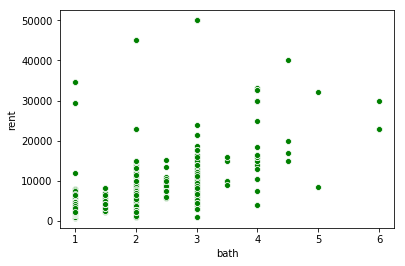

In [115]:
import matplotlib as plt
from matplotlib import style
import seaborn as sns

ax = sns.scatterplot(x= 'bath', y='rent', data = main_df, color = 'green')
#this scatterplot chart showing the price over time

In [116]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6538 entries, 0 to 6537
Data columns (total 12 columns):
address                6473 non-null object
bath                   6538 non-null float64
bedrooms               6538 non-null object
borough                6538 non-null object
extra                  6538 non-null object
nearest_subway         6538 non-null float64
neighborhood           6538 non-null object
rent                   6538 non-null int64
sqft                   6538 non-null int64
median_income          6538 non-null float64
percent_high_earner    6538 non-null float64
zipcode                6538 non-null float64
dtypes: float64(5), int64(2), object(5)
memory usage: 613.0+ KB


In [117]:
all_amenities_unsort = []

for row in list(test.extra):
    all_amenities_unsort += row

count_amenity = Counter(list(all_amenities_unsort))
all_amenities_count = count_amenity.most_common()

all_amenities = []

for row in list(all_amenities_count):
    all_amenities.append(row[0])
    
all_amenities


['Cats Allowed',
 'Elevator',
 'No Fee',
 'Dogs Allowed',
 'Laundry In Building',
 'Doorman',
 'Gym',
 'Dishwasher',
 'Hardwood Floors',
 'Renovated',
 'Common Outdoor Space',
 'High Ceilings',
 'Laundry In Unit',
 'Granite Kitchen',
 'Marble Bath',
 'Parking',
 'Pre War',
 'Valet',
 'Eat In Kitchen',
 'Walk In Closet',
 'Deck',
 'Lounge',
 'Concierge',
 'Storage Facility',
 'High Speed Internet',
 'Stainless Steel Appliances',
 'Outdoor Space',
 'Bicycle Room',
 'Dining Room',
 'Storage',
 'Diplomats Ok',
 'Receiving Room',
 'Microwave',
 'Private Outdoor Space',
 'New Construction',
 'City View',
 'Balcony',
 'Live In Super',
 'Business Center',
 'Swimming Pool',
 'Open View',
 'Wheelchair Access',
 'Reduced Fee',
 'Convertible',
 'Terrace',
 'Parking Space',
 'One Month Free',
 'Nursery',
 'Open Kitchen',
 'Garden/Patio',
 'Brownstone',
 'Loft',
 'Private Deck',
 'Roof Deck',
 'By Owner',
 'Virtual Doorman',
 'River View',
 'Children Playroom',
 'Laundry Room',
 'Furnished',
 'Firep

In [118]:
top_amenities = np.asarray(all_amenities[0:25])
top_amenities

array(['Cats Allowed', 'Elevator', 'No Fee', 'Dogs Allowed',
       'Laundry In Building', 'Doorman', 'Gym', 'Dishwasher',
       'Hardwood Floors', 'Renovated', 'Common Outdoor Space',
       'High Ceilings', 'Laundry In Unit', 'Granite Kitchen',
       'Marble Bath', 'Parking', 'Pre War', 'Valet', 'Eat In Kitchen',
       'Walk In Closet', 'Deck', 'Lounge', 'Concierge',
       'Storage Facility', 'High Speed Internet'], dtype='<U20')

In [119]:
def create_column_zeroes(column_name):
    test[column_name] = pd.Series([0 for x in range(len(test.index))])

In [120]:
for amenity in all_amenities[0:25]:
    create_column_zeroes(amenity)


In [121]:
test

,address,bath,bedrooms,borough,extra,nearest_subway,neighborhood,rent,sqft,median_income,...,Parking,Pre War,Valet,Eat In Kitchen,Walk In Closet,Deck,Lounge,Concierge,Storage Facility,High Speed Internet
0,453 Milford Street,1.0,3,Brooklyn,"[Dogs Allowed, Dishwasher, Microwave, Cats All...",0.50,New Lots,2200,0,63700.0,...,0,0,0,0,0,0,0,0,0,0
1,37 King St,1.0,1,Manhattan,"[Elevator, Dogs Allowed, Dishwasher, Cats Allo...",0.06,Hudson Square,4500,0,106056.0,...,0,0,0,0,0,0,0,0,0,0
2,Hudson St,2.0,2,Manhattan,[],0.18,Hudson Square,9395,0,106056.0,...,0,0,0,0,0,0,0,0,0,0
3,600 West 42nd Street,1.0,1,Manhattan,"[Elevator, Dogs Allowed, Dishwasher, Cats Allo...",0.38,Hell's Kitchen,4300,0,93707.0,...,0,0,0,0,0,0,0,0,0,0
4,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Brand New Renovations, Dogs Allowed, Reduced ...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,0,0,0,0,0,0,0,0,0
5,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Brand New Renovations, Dogs Allowed, Reduced ...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,0,0,0,0,0,0,0,0,0
6,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Brand New Renovations, Dogs Allowed, Reduced ...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,0,0,0,0,0,0,0,0,0
7,312 W 58th Street,2.0,4,Manhattan,"[No Fee, Laundry In Building, Dogs Allowed, Ca...",0.08,Hell's Kitchen,7150,1,93707.0,...,0,0,0,0,0,0,0,0,0,0
8,321 W 47th St,2.0,2,Manhattan,"[No Fee, Dogs Allowed, Dishwasher, Exposed Bri...",0.17,Hell's Kitchen,3500,0,93707.0,...,0,0,0,0,0,0,0,0,0,0
9,524 West 50th Street,1.0,Studio,Manhattan,"[Laundry In Building, Pre War Laundry On Every...",0.41,Hell's Kitchen,1999,500,93707.0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
def return_boolean_value_amenity(amenity_string, amenity_list): 
    
    if amenity_string in amenity_list: 
        return 1
  
    else: 
        return 0

In [123]:
return_boolean_value_amenity('Dishwasher', test.extra[0])

1

In [124]:
def return_boolean_value_amenity(amenity_string):
    #test[amenity_string] = np.where(amenity_string in test['extra'], 1, 0)
    test[amenity_string] = test.apply(lambda row: 1 if amenity_string in row['extra'] else 0, axis=1)

In [125]:
return_boolean_value_amenity('Pre War')
test

,address,bath,bedrooms,borough,extra,nearest_subway,neighborhood,rent,sqft,median_income,...,Parking,Pre War,Valet,Eat In Kitchen,Walk In Closet,Deck,Lounge,Concierge,Storage Facility,High Speed Internet
0,453 Milford Street,1.0,3,Brooklyn,"[Dogs Allowed, Dishwasher, Microwave, Cats All...",0.50,New Lots,2200,0,63700.0,...,0,0,0,0,0,0,0,0,0,0
1,37 King St,1.0,1,Manhattan,"[Elevator, Dogs Allowed, Dishwasher, Cats Allo...",0.06,Hudson Square,4500,0,106056.0,...,0,1,0,0,0,0,0,0,0,0
2,Hudson St,2.0,2,Manhattan,[],0.18,Hudson Square,9395,0,106056.0,...,0,0,0,0,0,0,0,0,0,0
3,600 West 42nd Street,1.0,1,Manhattan,"[Elevator, Dogs Allowed, Dishwasher, Cats Allo...",0.38,Hell's Kitchen,4300,0,93707.0,...,0,0,0,0,0,0,0,0,0,0
4,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Brand New Renovations, Dogs Allowed, Reduced ...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,1,0,0,0,0,0,0,0,0
5,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Brand New Renovations, Dogs Allowed, Reduced ...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,1,0,0,0,0,0,0,0,0
6,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Brand New Renovations, Dogs Allowed, Reduced ...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,1,0,0,0,0,0,0,0,0
7,312 W 58th Street,2.0,4,Manhattan,"[No Fee, Laundry In Building, Dogs Allowed, Ca...",0.08,Hell's Kitchen,7150,1,93707.0,...,0,0,0,0,0,0,0,0,0,0
8,321 W 47th St,2.0,2,Manhattan,"[No Fee, Dogs Allowed, Dishwasher, Exposed Bri...",0.17,Hell's Kitchen,3500,0,93707.0,...,0,0,0,0,0,0,0,0,0,0
9,524 West 50th Street,1.0,Studio,Manhattan,"[Laundry In Building, Pre War Laundry On Every...",0.41,Hell's Kitchen,1999,500,93707.0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
test.extra[1]

['Elevator',
 'Dogs Allowed',
 'Dishwasher',
 'Cats Allowed',
 'Intercom',
 'Renovated',
 'Pre War']

In [127]:
for amenity in all_amenities[0:25]:
    return_boolean_value_amenity(amenity)

In [128]:
test.extra[0]

['Dogs Allowed',
 'Dishwasher',
 'Microwave',
 'Cats Allowed',
 'Guarantors Accepted']

In [129]:
test.Dishwasher[0]

1

In [130]:
test['Cats Allowed'][0]

1

In [131]:
test['Dogs Allowed'][0]

1

In [132]:
main_db = test
main_db.to_csv("main_listing_dataframe.csv", index=False)
main_db.info()
main_db

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6538 entries, 0 to 6537
Data columns (total 37 columns):
address                 6473 non-null object
bath                    6538 non-null float64
bedrooms                6538 non-null object
borough                 6538 non-null object
extra                   6538 non-null object
nearest_subway          6538 non-null float64
neighborhood            6538 non-null object
rent                    6538 non-null int64
sqft                    6538 non-null int64
median_income           6538 non-null float64
percent_high_earner     6538 non-null float64
zipcode                 6538 non-null float64
Cats Allowed            6538 non-null int64
Elevator                6538 non-null int64
No Fee                  6538 non-null int64
Dogs Allowed            6538 non-null int64
Laundry In Building     6538 non-null int64
Doorman                 6538 non-null int64
Gym                     6538 non-null int64
Dishwasher              6538 non-null int6

,address,bath,bedrooms,borough,extra,nearest_subway,neighborhood,rent,sqft,median_income,...,Parking,Pre War,Valet,Eat In Kitchen,Walk In Closet,Deck,Lounge,Concierge,Storage Facility,High Speed Internet
0,453 Milford Street,1.0,3,Brooklyn,"[Dogs Allowed, Dishwasher, Microwave, Cats All...",0.50,New Lots,2200,0,63700.0,...,0,0,0,0,0,0,0,0,0,0
1,37 King St,1.0,1,Manhattan,"[Elevator, Dogs Allowed, Dishwasher, Cats Allo...",0.06,Hudson Square,4500,0,106056.0,...,0,1,0,0,0,0,0,0,0,0
2,Hudson St,2.0,2,Manhattan,[],0.18,Hudson Square,9395,0,106056.0,...,0,0,0,0,0,0,0,0,0,0
3,600 West 42nd Street,1.0,1,Manhattan,"[Elevator, Dogs Allowed, Dishwasher, Cats Allo...",0.38,Hell's Kitchen,4300,0,93707.0,...,0,0,0,0,0,0,0,0,0,0
4,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Brand New Renovations, Dogs Allowed, Reduced ...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,1,0,0,0,0,0,0,0,0
5,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Brand New Renovations, Dogs Allowed, Reduced ...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,1,0,0,0,0,0,0,0,0
6,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Brand New Renovations, Dogs Allowed, Reduced ...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,1,0,0,0,0,0,0,0,0
7,312 W 58th Street,2.0,4,Manhattan,"[No Fee, Laundry In Building, Dogs Allowed, Ca...",0.08,Hell's Kitchen,7150,1,93707.0,...,0,0,0,0,0,0,0,0,0,0
8,321 W 47th St,2.0,2,Manhattan,"[No Fee, Dogs Allowed, Dishwasher, Exposed Bri...",0.17,Hell's Kitchen,3500,0,93707.0,...,0,0,0,0,0,0,0,0,0,0
9,524 West 50th Street,1.0,Studio,Manhattan,"[Laundry In Building, Pre War Laundry On Every...",0.41,Hell's Kitchen,1999,500,93707.0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
cleaned_dummies = []
for names in list(main_df.columns)[12:]:
    cleaned_dummies.append(names.replace(' ', '_'))
    
new_column_dict = dict(zip(list(main_df.columns[12:]), cleaned_dummies))

In [134]:
main_db = main_db.rename(columns=new_column_dict)
main_db

,address,bath,bedrooms,borough,extra,nearest_subway,neighborhood,rent,sqft,median_income,...,Parking,Pre_War,Valet,Eat_In_Kitchen,Walk_In_Closet,Deck,Lounge,Concierge,Storage_Facility,High_Speed_Internet
0,453 Milford Street,1.0,3,Brooklyn,"[Dogs Allowed, Dishwasher, Microwave, Cats All...",0.50,New Lots,2200,0,63700.0,...,0,0,0,0,0,0,0,0,0,0
1,37 King St,1.0,1,Manhattan,"[Elevator, Dogs Allowed, Dishwasher, Cats Allo...",0.06,Hudson Square,4500,0,106056.0,...,0,1,0,0,0,0,0,0,0,0
2,Hudson St,2.0,2,Manhattan,[],0.18,Hudson Square,9395,0,106056.0,...,0,0,0,0,0,0,0,0,0,0
3,600 West 42nd Street,1.0,1,Manhattan,"[Elevator, Dogs Allowed, Dishwasher, Cats Allo...",0.38,Hell's Kitchen,4300,0,93707.0,...,0,0,0,0,0,0,0,0,0,0
4,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Brand New Renovations, Dogs Allowed, Reduced ...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,1,0,0,0,0,0,0,0,0
5,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Brand New Renovations, Dogs Allowed, Reduced ...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,1,0,0,0,0,0,0,0,0
6,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Brand New Renovations, Dogs Allowed, Reduced ...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,1,0,0,0,0,0,0,0,0
7,312 W 58th Street,2.0,4,Manhattan,"[No Fee, Laundry In Building, Dogs Allowed, Ca...",0.08,Hell's Kitchen,7150,1,93707.0,...,0,0,0,0,0,0,0,0,0,0
8,321 W 47th St,2.0,2,Manhattan,"[No Fee, Dogs Allowed, Dishwasher, Exposed Bri...",0.17,Hell's Kitchen,3500,0,93707.0,...,0,0,0,0,0,0,0,0,0,0
9,524 West 50th Street,1.0,Studio,Manhattan,"[Laundry In Building, Pre War Laundry On Every...",0.41,Hell's Kitchen,1999,500,93707.0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
main_db.bedrooms.unique()

array(['3', '1', '2', '4', 'Studio', '3Flex 4 ', 'StudioFlex 1 ',
       ' Studio', '2Flex 3 ', '4Flex 5 ', '1Flex 2 ', '2 ', ' 1', '1 ',
       '5', 'Studio ', ' 2', 'Loft', '3 ', 'Room', 'RoomFlex 0 ',
       'LoftFlex -1 ', '7', '4 ', ' 3', '6', ' 2Flex 3 '], dtype=object)

In [136]:
dummy = ''
for names in new_column_dict.values():
    dummy += names
    dummy += '+'
dummy

'Cats_Allowed+Elevator+No_Fee+Dogs_Allowed+Laundry_In_Building+Doorman+Gym+Dishwasher+Hardwood_Floors+Renovated+Common_Outdoor_Space+High_Ceilings+Laundry_In_Unit+Granite_Kitchen+Marble_Bath+Parking+Pre_War+Valet+Eat_In_Kitchen+Walk_In_Closet+Deck+Lounge+Concierge+Storage_Facility+High_Speed_Internet+'

In [137]:
main_db.columns

Index(['address', 'bath', 'bedrooms', 'borough', 'extra', 'nearest_subway',
       'neighborhood', 'rent', 'sqft', 'median_income', 'percent_high_earner',
       'zipcode', 'Cats_Allowed', 'Elevator', 'No_Fee', 'Dogs_Allowed',
       'Laundry_In_Building', 'Doorman', 'Gym', 'Dishwasher',
       'Hardwood_Floors', 'Renovated', 'Common_Outdoor_Space', 'High_Ceilings',
       'Laundry_In_Unit', 'Granite_Kitchen', 'Marble_Bath', 'Parking',
       'Pre_War', 'Valet', 'Eat_In_Kitchen', 'Walk_In_Closet', 'Deck',
       'Lounge', 'Concierge', 'Storage_Facility', 'High_Speed_Internet'],
      dtype='object')

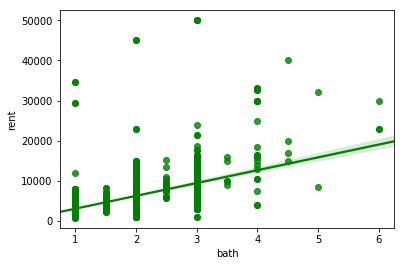

In [138]:
import matplotlib as plt
from matplotlib import style
import seaborn as sns

ax = sns.regplot(x= 'bath', y='rent', data = main_db, color = 'green')
#this scatterplot chart showing the price over time

In [139]:
from statsmodels.formula.api import ols

lr_model = ols(formula='rent~bath+Cats_Allowed+Elevator+No_Fee+Dogs_Allowed+Laundry_In_Building+Doorman+Gym+Dishwasher+Hardwood_Floors+Renovated+Common_Outdoor_Space+High_Ceilings+Laundry_In_Unit+Granite_Kitchen+Marble_Bath+Parking+Pre_War+Valet+Eat_In_Kitchen+Walk_In_Closet+Deck+Lounge+Concierge+Storage_Facility', data=main_db).fit()







In [140]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     203.2
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:42:40   Log-Likelihood:                -59028.
No. Observations:                6538   AIC:                         1.181e+05
Df Residuals:                    6512   BIC:                         1.183e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -426.6260     83.505     -5.109      0.000    -590.323    -262.929
bath                  3060.8884     49.082     62.362      0.000    2964.671    3157.106
Cats_Allowed           -83.9722    109.921     -0.764      0.445    -299.453     131.509
Elevator               499.4680     77.418      6.452      0.000     347.703     651.233
No_Fee                -131.8712     59.265     -2.225      0.026    -248.050     -15.693
Dogs_Allowed           230.8768    108.578      2.126      0.034      18.027     443.726
Laundry_In_Building   -530.4531     68.754     -7.715      0.000    -665.233    -395.673
Doorman                910.2118     81.044     11.231      0.000     751.339    1069.085
Gym                     14.8494     84.410      0.176      0.860    -150.622     180.320
Dishwasher              12.3938     70.867      0.175      0.861    -126.528     151.316
Hardwood_Floors        -92.9173     93.553     -0.993      0.321    -276.312      90.477
Renovated             -106.3484     86.361     -1.231      0.218    -275.645      62.948
Common_Outdoor_Space  -413.5669     81.647     -5.065      0.000    -573.621    -253.513
High_Ceilings           -0.7475     85.846     -0.009      0.993    -169.034     167.539
Laundry_In_Unit        379.0628     61.663      6.147      0.000     258.183     499.943
Granite_Kitchen        124.0624    104.802      1.184      0.237     -81.385     329.509
Marble_Bath            113.5262    104.200      1.090      0.276     -90.740     317.793
Parking               -165.3179     83.556     -1.979      0.048    -329.115      -1.521
Pre_War                222.8409     73.544      3.030      0.002      78.671     367.011
Valet                 -138.2792    108.979     -1.269      0.205    -351.914      75.356
Eat_In_Kitchen        -165.4669     90.737     -1.824      0.068    -343.341      12.407
Walk_In_Closet          34.7068     91.371      0.380      0.704    -144.410     213.823
Deck                    41.6292    111.079      0.375      0.708    -176.123     259.381
Lounge                 134.7133    105.343      1.279      0.201     -71.794     341.221
Concierge               16.5758    101.071      0.164      0.870    -181.557     214.709
Storage_Facility       194.1128     98.785      1.965      0.049       0.462     387.764
==============================================================================
Omnibus:                     9706.834   Durbin-Watson:                   1.297
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5801173.610
Skew:                           8.911   Prob(JB):                         0.00
Kurtosis:                     147.837   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Erro

In [141]:
main_db.to_csv("main_listing_dataframe.csv", index=False)
main_db.info()
main_db

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6538 entries, 0 to 6537
Data columns (total 37 columns):
address                 6473 non-null object
bath                    6538 non-null float64
bedrooms                6538 non-null object
borough                 6538 non-null object
extra                   6538 non-null object
nearest_subway          6538 non-null float64
neighborhood            6538 non-null object
rent                    6538 non-null int64
sqft                    6538 non-null int64
median_income           6538 non-null float64
percent_high_earner     6538 non-null float64
zipcode                 6538 non-null float64
Cats_Allowed            6538 non-null int64
Elevator                6538 non-null int64
No_Fee                  6538 non-null int64
Dogs_Allowed            6538 non-null int64
Laundry_In_Building     6538 non-null int64
Doorman                 6538 non-null int64
Gym                     6538 non-null int64
Dishwasher              6538 non-null int6

,address,bath,bedrooms,borough,extra,nearest_subway,neighborhood,rent,sqft,median_income,...,Parking,Pre_War,Valet,Eat_In_Kitchen,Walk_In_Closet,Deck,Lounge,Concierge,Storage_Facility,High_Speed_Internet
0,453 Milford Street,1.0,3,Brooklyn,"[Dogs Allowed, Dishwasher, Microwave, Cats All...",0.50,New Lots,2200,0,63700.0,...,0,0,0,0,0,0,0,0,0,0
1,37 King St,1.0,1,Manhattan,"[Elevator, Dogs Allowed, Dishwasher, Cats Allo...",0.06,Hudson Square,4500,0,106056.0,...,0,1,0,0,0,0,0,0,0,0
2,Hudson St,2.0,2,Manhattan,[],0.18,Hudson Square,9395,0,106056.0,...,0,0,0,0,0,0,0,0,0,0
3,600 West 42nd Street,1.0,1,Manhattan,"[Elevator, Dogs Allowed, Dishwasher, Cats Allo...",0.38,Hell's Kitchen,4300,0,93707.0,...,0,0,0,0,0,0,0,0,0,0
4,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Brand New Renovations, Dogs Allowed, Reduced ...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,1,0,0,0,0,0,0,0,0
5,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Brand New Renovations, Dogs Allowed, Reduced ...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,1,0,0,0,0,0,0,0,0
6,785 Ninth Avenue 3c,1.0,2,Manhattan,"[Brand New Renovations, Dogs Allowed, Reduced ...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,1,0,0,0,0,0,0,0,0
7,312 W 58th Street,2.0,4,Manhattan,"[No Fee, Laundry In Building, Dogs Allowed, Ca...",0.08,Hell's Kitchen,7150,1,93707.0,...,0,0,0,0,0,0,0,0,0,0
8,321 W 47th St,2.0,2,Manhattan,"[No Fee, Dogs Allowed, Dishwasher, Exposed Bri...",0.17,Hell's Kitchen,3500,0,93707.0,...,0,0,0,0,0,0,0,0,0,0
9,524 West 50th Street,1.0,Studio,Manhattan,"[Laundry In Building, Pre War Laundry On Every...",0.41,Hell's Kitchen,1999,500,93707.0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
test = main_db

In [ ]:
#test_df[df.studio != 'Tina']

for i, row in test.iterrows():
    if 'Room' in test['extra'][i]:
        test.loc['bedrooms'][i] = 1

In [ ]:
test['bedrooms'] = test.apply(lambda row: 1 if 'Room' in row['bedrooms'] else row['bedrooms'], axis=1)

In [ ]:
#test.loc[test.bedrooms == 'Room']
#test.loc[test.index == 1045]
test

In [ ]:
type(str(test.loc[test.index == 1045].bedrooms))

In [ ]:
test.bedrooms.unique()

In [ ]:
test['Studio'] = pd.Series([0 for x in range(len(test.index))])
test['Flex'] = pd.Series([0 for x in range(len(test.index))])

In [ ]:
test.columns

In [ ]:
test['Studio'] = test.apply(lambda row: 1 if 'Studio' or 'StudioFlex 1 ' or ' Studio' or 'Studio ' in row['bedrooms'] else 0, axis=1)
test['Flex'] = test.apply(lambda row: 1 if '3Flex 4'  or 'StudioFlex 1 ' or '2Flex 3 ' or '4Flex 5 ' or '1Flex 2 ' or 'LoftFlex -1 ' or ' 2Flex 3 ' in row['bedrooms'] else 0, axis=1)





In [ ]:
test

In [ ]:
test.sort_values(by = 'bedrooms', ascending=False)